# **Phân tích churn và chiến lược giữ chân khách hàng trong ngành ngân hàng**
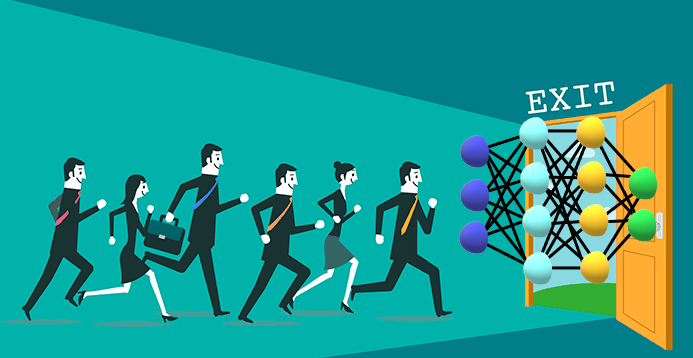

# 1. Introduction

## 1.1 Mục tiêu phân tích
- Xác định các yếu tố quan trọng ảnh hưởng đến việc khách hàng rời bỏ ngân hàng.  
- Phân tích đặc điểm nhân khẩu học, hành vi và tài chính của nhóm khách hàng churn.    
- Đưa ra insight hỗ trợ ngân hàng xây dựng chiến lược giữ chân khách hàng.  


## 1.2 Kết quả kỳ vọng
- Xác định được nhóm khách hàng có nguy cơ rời bỏ cao (theo tuổi, hành vi, tài chính).
- Báo cáo insight: yếu tố nào ảnh hưởng mạnh nhất đến churn.
- Đề xuất chiến lược giữ chân khách hàng giá trị cao, giảm churn rate.


## 1.3 Bộ dữ liệu
- Nguồn: Kaggle – Bank Customer Churn Dataset.
- Số lượng quan sát: ~10,000 khách hàng.
- Biến quan trọng:
  + RowNumber – Số thứ tự của bản ghi (chỉ để đánh dấu dòng, không ảnh hưởng đến phân tích).
  + CustomerId – Mã định danh khách hàng (giá trị ngẫu nhiên, không ảnh hưởng đến việc churn).
  + Surname – Họ của khách hàng (không tác động đến churn).
  + CreditScore – Điểm tín dụng của khách hàng (càng cao thì khả năng rời bỏ ngân hàng càng thấp).
  + Geography – Quốc gia/khu vực nơi khách hàng sinh sống (có thể ảnh hưởng đến churn do khác biệt địa lý).
  + Gender – Giới tính của khách hàng (có thể kiểm tra vai trò trong churn).
  + Age – Tuổi của khách hàng (tuổi cao hơn thường ít rời bỏ ngân hàng hơn).
  + Tenure – Số năm khách hàng gắn bó với ngân hàng (thời gian lâu hơn thường gắn bó cao hơn).
  + Balance – Số dư trong tài khoản của khách hàng (có số dư cao thường ít churn hơn).
  + NumOfProducts – Số lượng sản phẩm/dịch vụ mà khách hàng đã sử dụng tại ngân hàng.
  + HasCrCard – Biến nhị phân (1 = có, 0 = không), cho biết khách hàng có thẻ tín dụng hay không.
  + IsActiveMember – Biến nhị phân (1 = khách hàng đang hoạt động, 0 = không).
  + EstimatedSalary – Thu nhập ước tính hàng năm của khách hàng.
  + Exited – Biến mục tiêu (1 = khách hàng đã rời bỏ, 0 = khách hàng ở lại).
  + Complain – Biến nhị phân (1 = khách hàng từng có khiếu nại, 0 = không).
  + Satisfaction Score – Điểm đánh giá mức độ hài lòng của khách hàng (sau khi giải quyết khiếu nại).
  + Card Type – Loại thẻ tín dụng mà khách hàng đang sở hữu (ví dụ: Gold, Silver, Platinum…).
  + Points Earned – Điểm thưởng mà khách hàng tích lũy được từ việc sử dụng thẻ.


# 2. Tải các thư viện cần thiết và dữ liệu

## 2.1 Tải thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## 2.2 Tải dữ liệu

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nghia-1401/Bank-Customer-Churn-Analysis/refs/heads/main/Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# 3. Mô tả dữ liệu

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


# 4. Làm sạch dữ liệu

## 4.1 Xóa các cột không cần thiết

In [5]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

## 4.2 Chuyển đổi kiểu dữ liệu

In [6]:
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  Int64  
 1   Geography           10000 non-null  string 
 2   Gender              10000 non-null  string 
 3   Age                 10000 non-null  Int64  
 4   Tenure              10000 non-null  Int64  
 5   Balance             10000 non-null  Float64
 6   NumOfProducts       10000 non-null  Int64  
 7   HasCrCard           10000 non-null  Int64  
 8   IsActiveMember      10000 non-null  Int64  
 9   EstimatedSalary     10000 non-null  Float64
 10  Exited              10000 non-null  Int64  
 11  Complain            10000 non-null  Int64  
 12  Satisfaction Score  10000 non-null  Int64  
 13  Card Type           10000 non-null  string 
 14  Point Earned        10000 non-null  Int64  
dtypes: Float64(2), Int64(10), string(3)
memory usage: 1.3 

## 4.3 Kiểm tra các giá trị thiếu

In [7]:
df.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


## 4.4 Kiển tra tính trùng lặp

In [8]:
df.duplicated().sum()

np.int64(0)

## 4.5 Kiểm tra các giá trị ngoại lai

In [9]:
# Check outliers
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Point Earned']
outlier_counts = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Xác định giới hạn
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Đếm số lượng Outlier
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

    print(f"Cột {col}: {len(outliers)} outliers. (Giới hạn: [{lower_bound:.2f}, {upper_bound:.2f}])")

# Số lượng outlier trên tổng 10000 bản ghi
total_outliers = sum(outlier_counts.values())
print(f"\nTổng số outlier (trên tất cả các cột): {total_outliers}")

Cột CreditScore: 15 outliers. (Giới hạn: [383.00, 919.00])
Cột Age: 359 outliers. (Giới hạn: [14.00, 62.00])
Cột Tenure: 0 outliers. (Giới hạn: [-3.00, 13.00])
Cột Balance: 0 outliers. (Giới hạn: [-191466.36, 319110.60])
Cột EstimatedSalary: 0 outliers. (Giới hạn: [-96577.10, 296967.45])
Cột Point Earned: 0 outliers. (Giới hạn: [-176.50, 1387.50])

Tổng số outlier (trên tất cả các cột): 374


# 5. Phân tích khám phá (EDA)

## 5.1 Phân tích mô tả

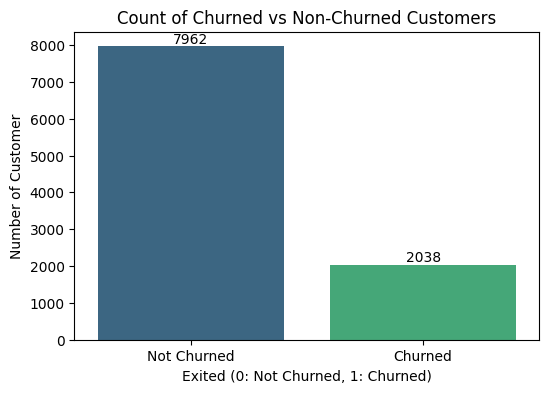

In [10]:
# Count of churned vs non-churned customers
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Exited', data=df, hue='Exited', palette='viridis', legend=False)
plt.title('Count of Churned vs Non-Churned Customers')
plt.xlabel('Exited (0: Not Churned, 1: Churned)')
plt.ylabel('Number of Customer')
plt.xticks([0, 1], ['Not Churned', 'Churned'])

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

**Insight:** Số lượng khách hàng không rời đi là 7962, trong khi số lượng khách hàng rời đi là 2038, chiếm khoảng 20.4%.

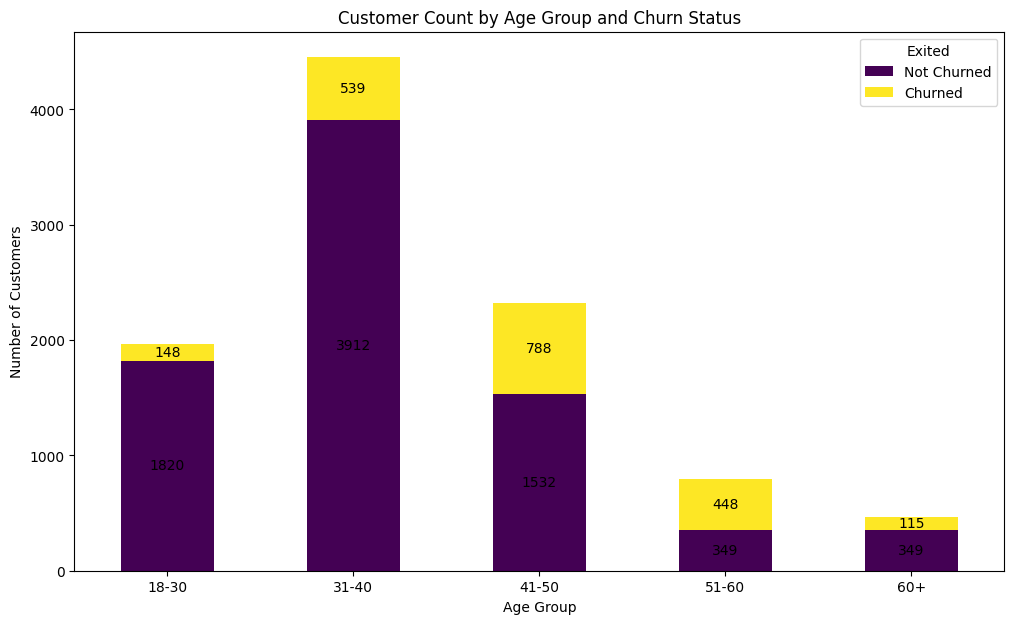

In [11]:
# Count of customers by Age Group and Churn Status
def create_age_group(age):
    if age <= 30:
        return '18-30'
    elif age <= 40:
        return '31-40'
    elif age <= 50:
        return '41-50'
    elif age <= 60:
        return '51-60'
    else:
        return '60+'

# Create age groups as a Series without adding to the DataFrame
age_groups = df['Age'].apply(create_age_group)

# Group by the temporary age_groups Series and Churn Status
customer_count_by_age_group = df.groupby([age_groups, 'Exited']).size().unstack(fill_value=0)

# Visualize customer count by Age Group and Churn Status
plt.figure(figsize=(12, 7))
ax = customer_count_by_age_group.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Customer Count by Age Group and Churn Status')
plt.ylabel('Number of Customers')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.legend(title='Exited', labels=['Not Churned', 'Churned'])

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center')

plt.show()

# No need to drop the temporary 'Age_Group' column as it was not added to df

**Insight:**
- Nhóm tuổi 31-40 có số lượng khách hàng đông nhất, cả trong nhóm churned và non-churned.
- Nhóm tuổi 41-50 có số lượng khách hàng churned cao nhất, mặc dù tổng số khách hàng ít hơn nhóm 31-40.
- Nhóm tuổi 51-60 có tỷ lệ churned trên tổng số khách hàng trong nhóm cao nhất.
- Nhóm tuổi trẻ hơn (18-30) có số lượng khách hàng churned ít nhất.

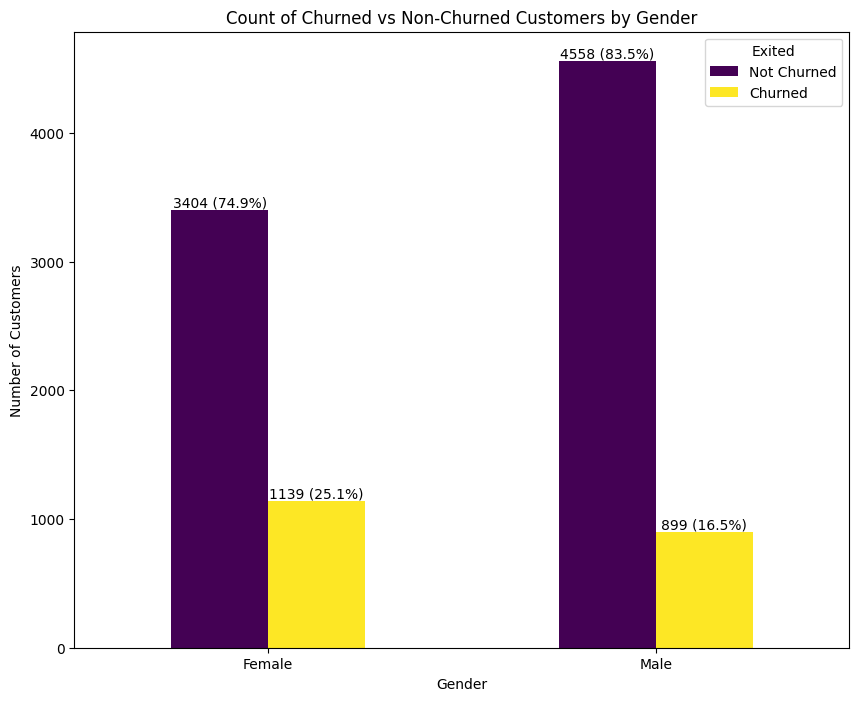

In [12]:
# Count of churned and non-churned customers by Gender using original column
churn_gender_counts = df.groupby(['Exited', 'Gender']).size().unstack(fill_value=0)

# Rename columns for clarity (Gender_Female: 0=Male, 1=Female)
# churn_gender_counts = churn_gender_counts.rename(columns={0: 'Male', 1: 'Female'}) # Not needed with original Gender column

# Calculate percentages
churn_gender_percentages = churn_gender_counts.T.apply(lambda x: x / x.sum() * 100, axis=1)

# Plotting
ax = churn_gender_counts.T.plot(kind='bar', figsize=(10, 8), colormap='viridis')
plt.title('Count of Churned vs Non-Churned Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Exited', labels=['Not Churned', 'Churned'])

# Add labels to the bars with percentages
for i, container in enumerate(ax.containers):
    for j, p in enumerate(container.patches):
        percentage = churn_gender_percentages.iloc[j, i]
        ax.annotate(f'{int(p.get_height())} ({percentage:.1f}%)',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

**Insight:** Phụ nữ có tỷ lệ churn (25.1%) cao hơn nam giới (16.5%). Giới tính là một yếu tố có ảnh hưởng đến khả năng churn.

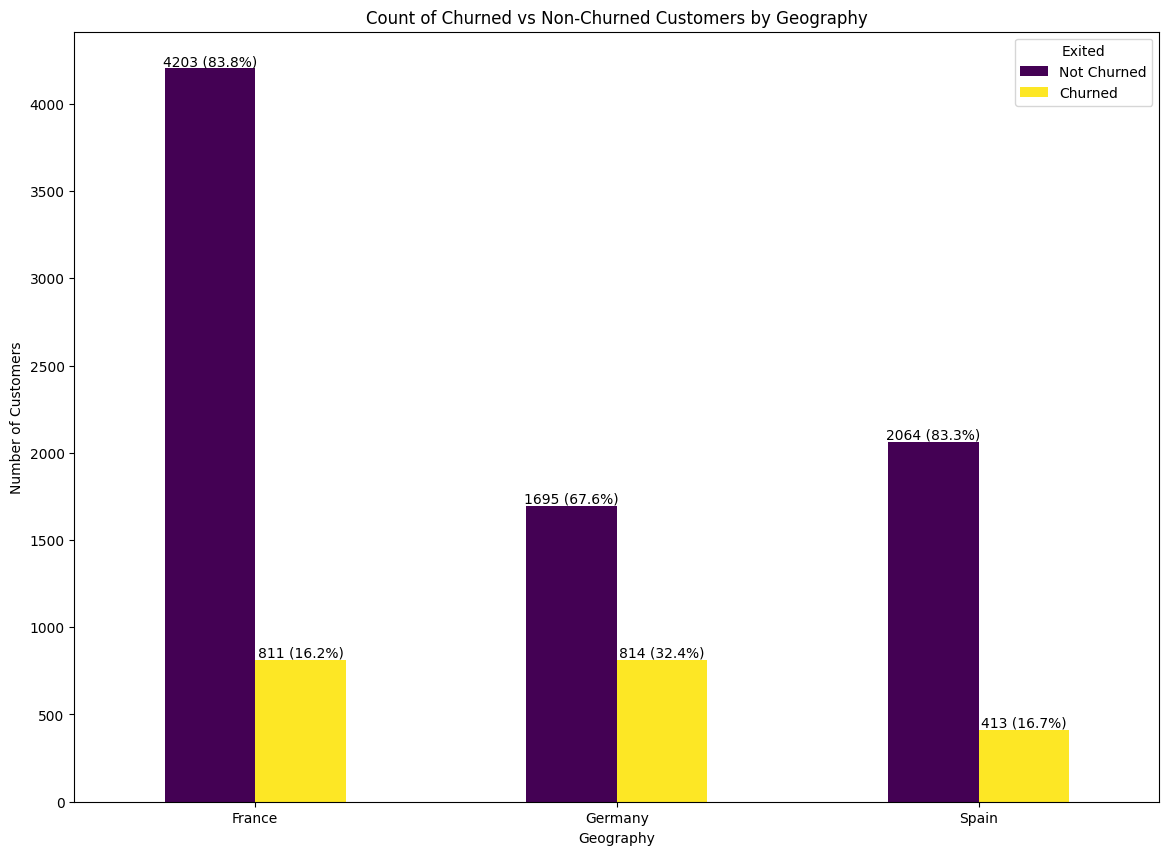

In [13]:
# Count of churned and non-churned customers by Geography using original columns
churn_geography_counts = df.groupby(['Exited', 'Geography']).size().unstack(fill_value=0)

# Calculate percentages
churn_geography_percentages = churn_geography_counts.T.apply(lambda x: x / x.sum() * 100, axis=1)

# Plotting
ax = churn_geography_counts.T.plot(kind='bar', figsize=(14, 10), colormap='viridis')
plt.title('Count of Churned vs Non-Churned Customers by Geography')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Exited', labels=['Not Churned', 'Churned'])

# Add labels to the bars with percentages
for i, container in enumerate(ax.containers):
    for j, p in enumerate(container.patches):
        geography_label = churn_geography_counts.T.index[j]
        exited_status = churn_geography_counts.T.columns[i]
        percentage = churn_geography_percentages.loc[geography_label, exited_status]
        ax.annotate(f'{int(p.get_height())} ({percentage:.1f}%)',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

**Insight:**
- Pháp có số lượng khách hàng lớn nhất, nhưng tỷ lệ churn (16.2%) thấp nhất trong 3 quốc gia.
- Đức có số lượng khách hàng ít hơn Pháp và Tây Ban Nha, nhưng lại có tỷ lệ churn (32.4%) cao nhất. Điều này cho thấy khách hàng ở Đức có rủi ro churn cao hơn đáng kể.
- Tây Ban Nha có tỷ lệ churn (16.7%) tương đương với Pháp, nhưng số lượng khách hàng ít hơn so với Pháp

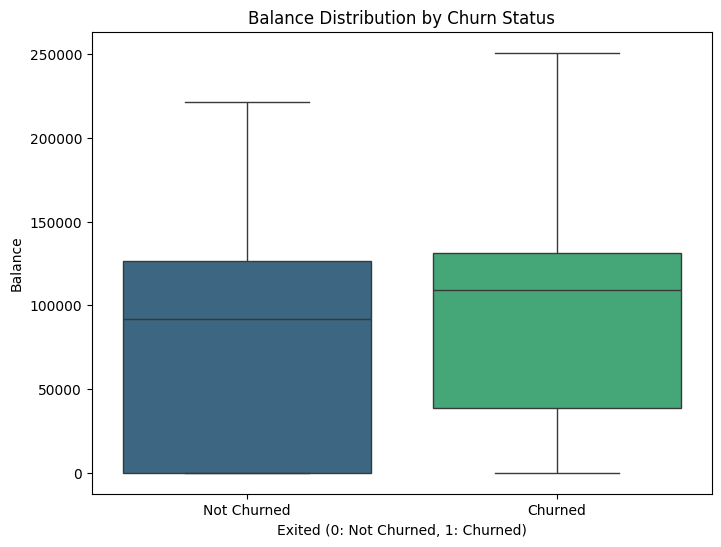

In [14]:
# Box plot for Balance by Churn Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='Balance', data=df, hue='Exited', palette='viridis', legend=False)
plt.title('Balance Distribution by Churn Status')
plt.xlabel('Exited (0: Not Churned, 1: Churned)')
plt.ylabel('Balance')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

**Insight:**
- Khách hàng churned có xu hướng có số dư tài khoản trung bình cao hơn, cho thấy khách hàng có số dư cao hơn có khả năng rời đi cao hơn.
- Với nhóm non-churned, có 1 số lượng lớn nhóm khách hàng có số dư bằng 0 hoặc rất thấp, cho thấy nhóm khách hàng này khá trung thành.

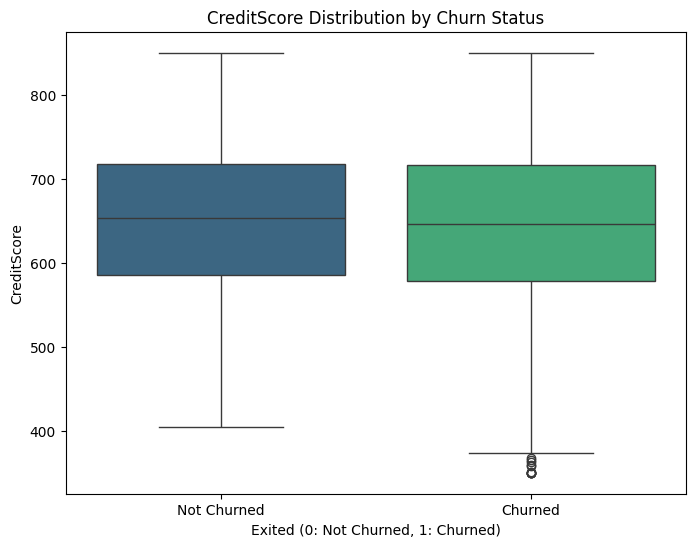

In [15]:
# Box plot for CreditScore by Churn Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='CreditScore', data=df, hue='Exited', palette='viridis', legend=False)
plt.title('CreditScore Distribution by Churn Status')
plt.xlabel('Exited (0: Not Churned, 1: Churned)')
plt.ylabel('CreditScore')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

**Insight:** Phân bố của CreditScore giữa hai nhóm churned và non-churned khá tương đồng, cho thấy hai biến này có thể không phải là yếu tố dự đoán churn mạnh mẽ.

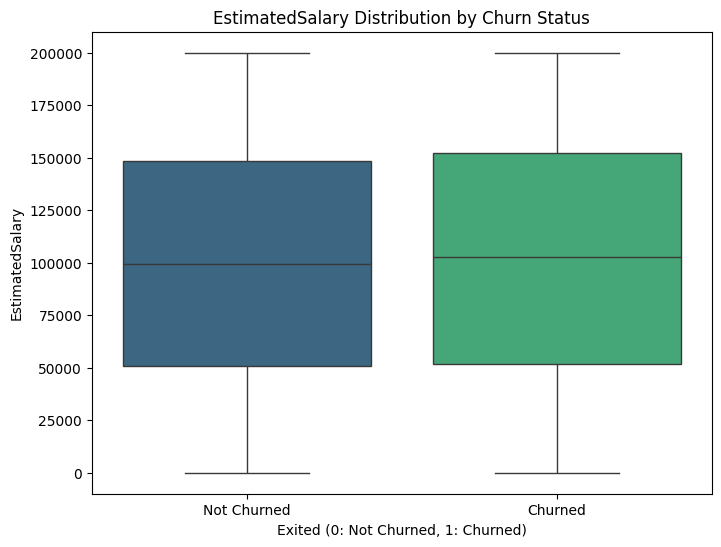

In [16]:
# Box plot for EstimatedSalary by Churn Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='EstimatedSalary', data=df, hue='Exited', palette='viridis', legend=False)
plt.title('EstimatedSalary Distribution by Churn Status')
plt.xlabel('Exited (0: Not Churned, 1: Churned)')
plt.ylabel('EstimatedSalary')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

**Insight:** Phân bố của EstimatedSalary giữa hai nhóm churned và non-churned khá tương đồng, cho thấy hai biến này có thể không phải là yếu tố dự đoán churn mạnh mẽ.

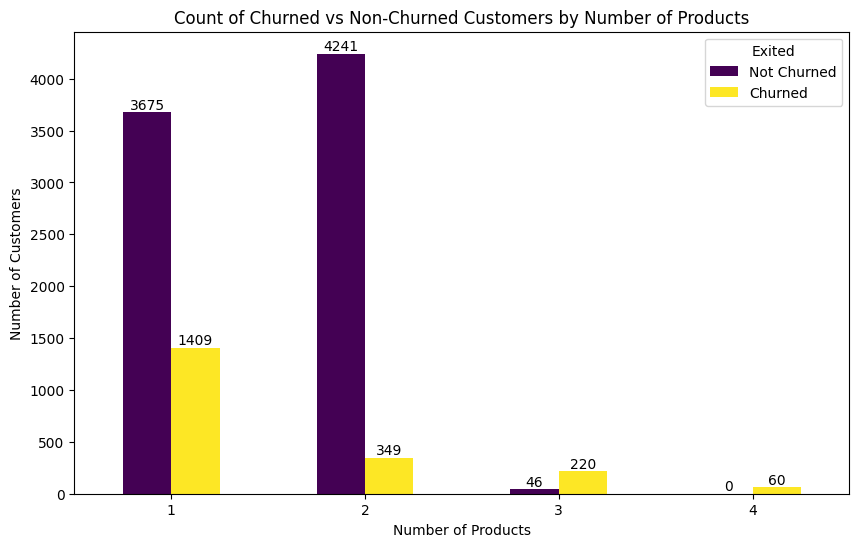

In [17]:
# Count of churned and non-churned customers by NumOfProducts
churn_num_products_counts = df.groupby(['Exited', 'NumOfProducts']).size().unstack(fill_value=0)

# Plotting
ax = churn_num_products_counts.T.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Count of Churned vs Non-Churned Customers by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Exited', labels=['Not Churned', 'Churned'])

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.show()

**Insight:**
- Đa số khách hàng mua 1 hoặc 2 sản phẩm thông qua ngân hàng.
- Số lượng khách hàng rời đi tập trung chủ yếu ở nhóm có 1 sản phẩm (1409). Tuy nhiên, nhóm có 3 hoặc 4 sản phẩm có tỷ lệ churn cực kỳ cao (gần 100%), mặc dù số lượng khách hàng trong nhóm này ít.

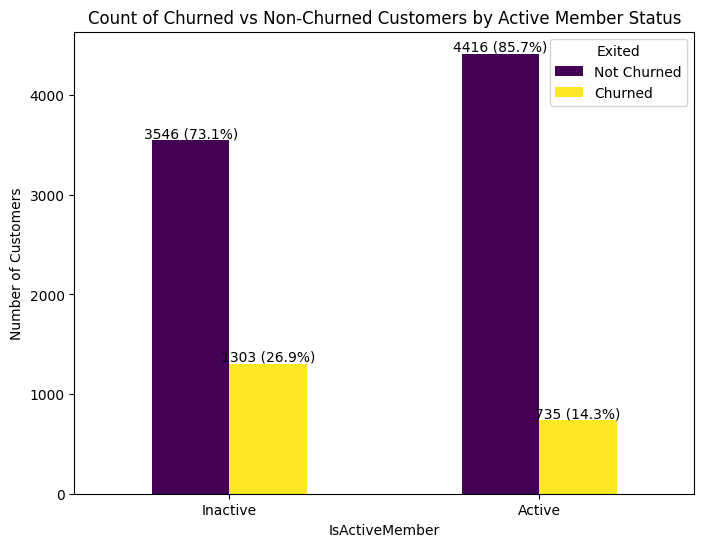

In [18]:
# Count of churned and non-churned customers by Active Member Status
churn_active_counts = df.groupby(['Exited', 'IsActiveMember']).size().unstack(fill_value=0)

# Calculate percentages
churn_active_percentages = churn_active_counts.T.apply(lambda x: x / x.sum() * 100, axis=1)


# Plotting
ax = churn_active_counts.T.plot(kind='bar', figsize=(8, 6), colormap='viridis')
plt.title('Count of Churned vs Non-Churned Customers by Active Member Status')
plt.xlabel('IsActiveMember')
plt.ylabel('Number of Customers')
plt.xticks([0, 1], ['Inactive', 'Active'], rotation=0) # Corrected xticks
plt.legend(title='Exited', labels=['Not Churned', 'Churned'])

# Add labels to the bars with percentages
for i, container in enumerate(ax.containers):
    for j, p in enumerate(container.patches):
        percentage = churn_active_percentages.iloc[j, i]
        ax.annotate(f'{int(p.get_height())} ({percentage:.1f}%)',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

**Insight:** Số lượng khách hàng không hoạt động rời đi (1303) nhiều hơn đáng kể so với khách hàng hoạt động rời đi (735), mặc dù số lượng khách hàng hoạt động nhiều hơn.

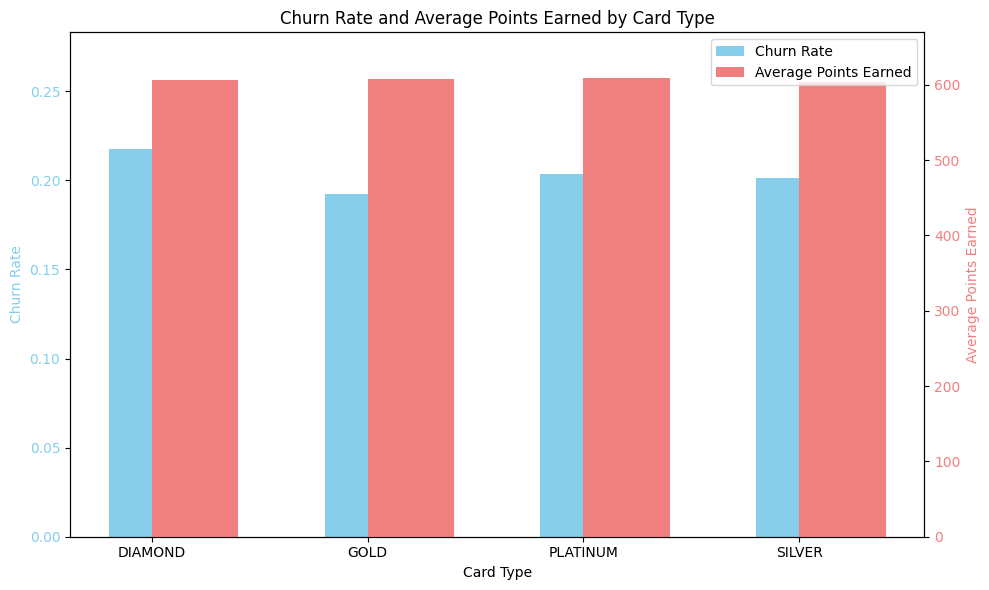

In [19]:
# Reload the dataset for this specific analysis to ensure correct column state
df_card_type_analysis = pd.read_csv('https://raw.githubusercontent.com/nghia-1401/Bank-Customer-Churn-Analysis/refs/heads/main/Customer-Churn-Records.csv')

# Apply previous cleaning steps (dropping unnecessary columns and converting data types)
df_card_type_analysis = df_card_type_analysis.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df_card_type_analysis = df_card_type_analysis.convert_dtypes()

# Calculate churn rate by Card Type
churn_by_card_type = df_card_type_analysis.groupby('Card Type')['Exited'].mean().reset_index()
churn_by_card_type.rename(columns={'Exited': 'Churn Rate'}, inplace=True)

# Calculate average points earned by Card Type
points_by_card_type = df_card_type_analysis.groupby('Card Type')['Point Earned'].mean().reset_index()
points_by_card_type.rename(columns={'Point Earned': 'Average Points Earned'}, inplace=True)

# Merge the two dataframes
churn_points_by_card_type = pd.merge(churn_by_card_type, points_by_card_type, on='Card Type')

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Churn Rate on the primary y-axis
bars1 = ax1.bar(churn_points_by_card_type['Card Type'], churn_points_by_card_type['Churn Rate'], color='skyblue', label='Churn Rate', width=0.4)
ax1.set_title('Churn Rate and Average Points Earned by Card Type')
ax1.set_xlabel('Card Type')
ax1.set_ylabel('Churn Rate', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_ylim(0, churn_points_by_card_type['Churn Rate'].max() * 1.3) # Adjusted ylim for labels

# Create a secondary y-axis for Average Points Earned
ax2 = ax1.twinx()
bars2 = ax2.bar(churn_points_by_card_type['Card Type'], churn_points_by_card_type['Average Points Earned'], color='lightcoral', label='Average Points Earned', width=0.4, align='edge')
ax2.set_ylabel('Average Points Earned', color='lightcoral')
ax2.tick_params(axis='y', labelcolor='lightcoral')
ax2.set_ylim(0, churn_points_by_card_type['Average Points Earned'].max() * 1.1) # Adjusted ylim for labels

# Add legends
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()

# Note: This analysis uses a temporary DataFrame and does not affect the main 'df' DataFrame used in subsequent cells.

**Insight:**
- Không có mối liên hệ mạnh mẽ giữa card type và Churn rate: Biểu đồ cho thấy tỷ lệ churn khá đồng đều giữa các loại thẻ DIAMOND, GOLD, PLATINUM và SILVER. Không có loại thẻ nào có tỷ lệ churn cao hơn hoặc thấp hơn đáng kể so với các loại khác.
- Điểm trung bình tích lũy cũng tương đồng giữa các loại thẻ: Tương tự như tỷ lệ churn, điểm trung bình tích lũy của khách hàng cũng khá tương đồng giữa các loại thẻ, dao động trong khoảng từ 600-610 điểm.

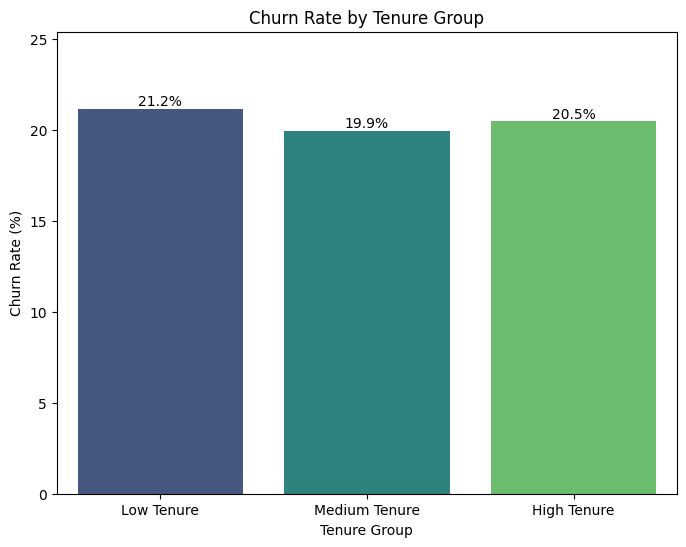

In [20]:
# Categorize Tenure into groups
def categorize_tenure(tenure):
    if tenure <= 2:
        return 'Low Tenure'
    elif tenure <= 7:
        return 'Medium Tenure'
    else:
        return 'High Tenure'

tenure_category_series = df['Tenure'].apply(categorize_tenure)

# Calculate average churn rate by Tenure Category using the temporary Series
churn_by_tenure_group = df.groupby(tenure_category_series)['Exited'].mean().reset_index()

# Rename the columns for clarity
churn_by_tenure_group.columns = ['Tenure Group', 'Churn Rate']

# Multiply churn rate by 100 to get percentage
churn_by_tenure_group['Churn Rate'] = churn_by_tenure_group['Churn Rate'] * 100

# Define the order of Tenure Groups for display
tenure_order = ['Low Tenure', 'Medium Tenure', 'High Tenure']
churn_by_tenure_group = churn_by_tenure_group.set_index('Tenure Group').reindex(tenure_order).reset_index()

# Plotting
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Tenure Group', y='Churn Rate', data=churn_by_tenure_group, palette='viridis', hue='Tenure Group', legend=False)
plt.title('Churn Rate by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Churn Rate (%)')
plt.ylim(0, churn_by_tenure_group['Churn Rate'].max() * 1.2)

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

**Insight:**  
Tỷ lệ churn khá đồng đều giữa các nhóm thời gian gắn bó: Biểu đồ cho thấy tỷ lệ churn không có sự chênh lệch đáng kể giữa nhóm khách hàng có thời gian gắn bó thấp (Low Tenure), trung bình (Medium Tenure) và cao (High Tenure). Tỷ lệ churn dao động quanh mức 20% cho cả ba nhóm.

## 5.2 Câu hỏi phân tích mối quan hệ

### 1. Có phải khách hàng trẻ tuổi (<30) có tỷ lệ churn cao hơn vì họ ít gắn bó (tenure thấp)?

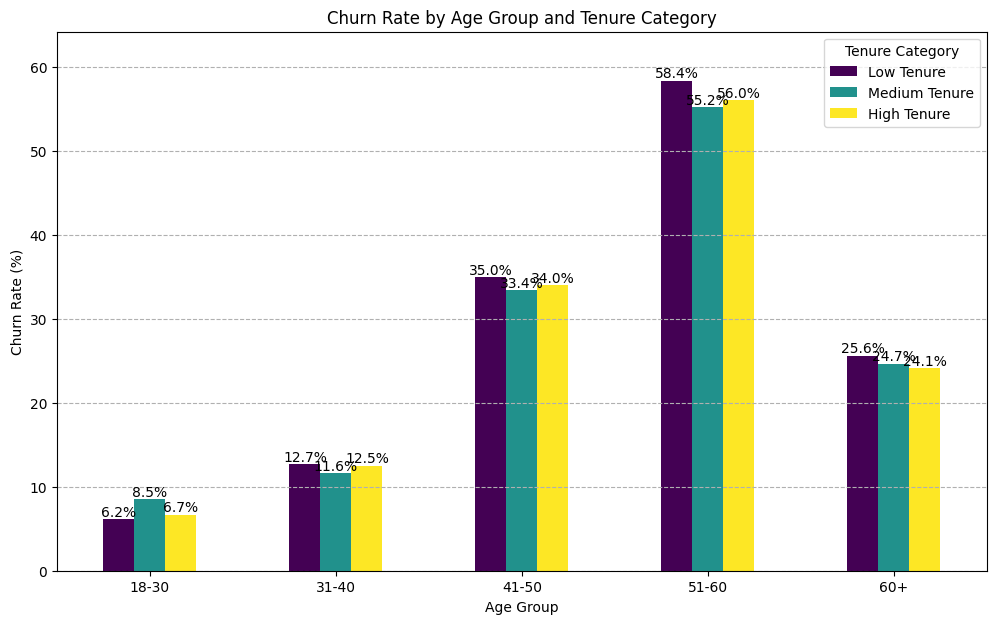

In [21]:
# Calculate churn rate by Age Group and Tenure Category using the temporary Series
churn_by_age_tenure = df.groupby([age_groups, tenure_category_series])['Exited'].mean().unstack(fill_value=0)

# Multiply churn rate by 100 to get percentage
churn_by_age_tenure = churn_by_age_tenure * 100

# Define the order of Age Groups and Tenure Categories for plotting
age_order = ['18-30', '31-40', '41-50', '51-60', '60+']
tenure_order = ['Low Tenure', 'Medium Tenure', 'High Tenure']
churn_by_age_tenure = churn_by_age_tenure.reindex(index=age_order, columns=tenure_order) # Reindex to ensure order

# Plotting
ax = churn_by_age_tenure.plot(kind='bar', figsize=(12, 7), colormap='viridis')
plt.title('Churn Rate by Age Group and Tenure Category')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate (%)') # Update y-axis label
plt.ylim(0, churn_by_age_tenure.values.max() * 1.1) # Adjust ylim based on data

# Add labels to the bars (optional, can make it cluttered)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge') # Format as percentage

plt.xticks(rotation=0)
plt.legend(title='Tenure Category')
plt.grid(axis='y', linestyle='--')
plt.show()

# No need to drop the temporary Series as they were not added to df

**Insight:**  
- Đối với nhóm tuổi trẻ nhất (18-30): Tỷ lệ churn ở nhóm có Tenure thấp (Low Tenure) là khoảng 6.17%. Tỷ lệ này tăng nhẹ ở nhóm Tenure Trung bình (Medium Tenure) khoảng 8.54%, và giảm nhẹ ở nhóm Tenure Cao (High Tenure) khoảng 6.67%. Mặc dù có sự biến động, nhưng sự khác biệt về tỷ lệ churn giữa các nhóm Tenure trong độ tuổi 18-30 không quá lớn.  
- Nhóm tuổi 51-60 có tỷ lệ churn cao nhất ở tất cả các nhóm tenure
- Nhóm tuổi 41-50 và 60+ cũng có tỷ lệ churn cao hơn đáng kể so với các nhóm 1

### 2. Khách hàng có khiếu nại (Complain = Yes) có churn cao hơn nhóm không khiếu nại?

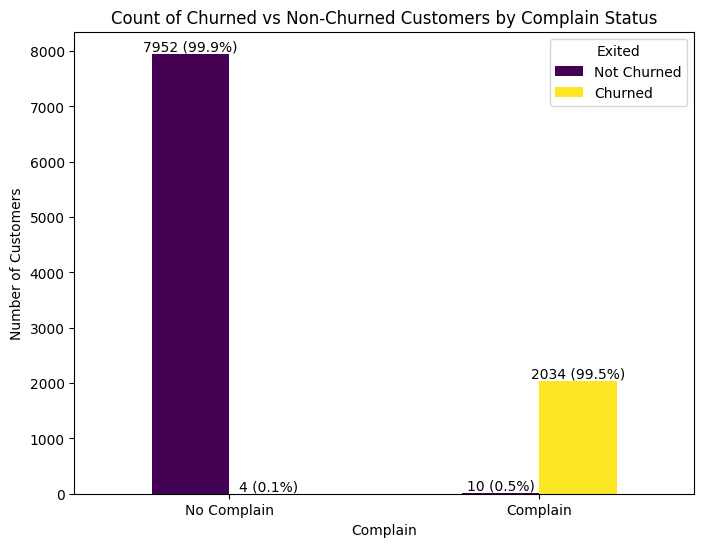

In [22]:
# Count of churned and non-churned customers by Complain status
churn_complain_counts = df.groupby(['Exited', 'Complain']).size().unstack(fill_value=0)

# Calculate percentages
churn_complain_percentages = churn_complain_counts.T.apply(lambda x: x / x.sum() * 100, axis=1)

# Plotting
ax = churn_complain_counts.T.plot(kind='bar', figsize=(8, 6), colormap='viridis')
plt.title('Count of Churned vs Non-Churned Customers by Complain Status')
plt.xlabel('Complain')
plt.ylabel('Number of Customers')
plt.xticks([0, 1], ['No Complain', 'Complain'], rotation=0) # Corrected xticks
plt.legend(title='Exited', labels=['Not Churned', 'Churned'])

# Add labels to the bars with percentages
for i, container in enumerate(ax.containers):
    for j, p in enumerate(container.patches):
        # Correct indexing to get the percentage
        # i corresponds to the Exited status (0 or 1) as columns in churn_complain_counts.T
        # j corresponds to the Complain status (0 or 1) as index in churn_complain_counts.T
        percentage = churn_complain_percentages.iloc[j, i]
        ax.annotate(f'{int(p.get_height())} ({percentage:.1f}%)',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

**Insight:**
- Biểu đồ này cho thấy một mối quan hệ cực kỳ mạnh mẽ: Gần như tất cả khách hàng có khiếu nại (Complain = 1) đều rời đi (2034 churned vs 10 non-churned).
- Ngược lại, trong nhóm không khiếu nại (Complain = 0), chỉ có rất ít khách hàng rời đi (4 churned vs 7952 non-churned), cho thấy biến 'Complain' là một yếu tố dự báo churn cực kỳ mạnh.

### 3. Có mối quan hệ nào giữa Satisfaction Score và churn rate?

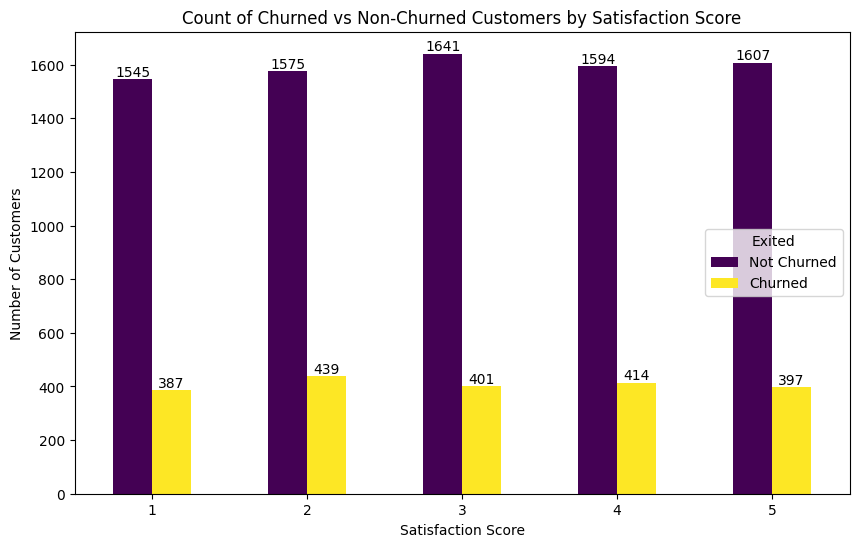

In [23]:
# Count of churned and non-churned customers by Satisfaction Score
churn_satisfaction_counts = df.groupby(['Exited', 'Satisfaction Score']).size().unstack(fill_value=0)

# Plotting
ax = churn_satisfaction_counts.T.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Count of Churned vs Non-Churned Customers by Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Exited', labels=['Not Churned', 'Churned'])

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.show()

**Insight:**
- Biểu đồ này cho thấy số lượng khách hàng churned và non-churned ở các mức điểm hài lòng từ 1 đến 5. Số lượng khách hàng ở mỗi mức điểm hài lòng khá đồng đều.
- Số lượng khách hàng churned cũng phân bố tương đối đồng đều trên các mức điểm hài lòng, không có mức điểm nào nổi bật hẳn lên về số lượng churned cao hơn đáng kể so với các mức khác.

### 4. Có phải churn cao tập trung ở nhóm khách có số dư thấp và không hoạt động thường xuyên?

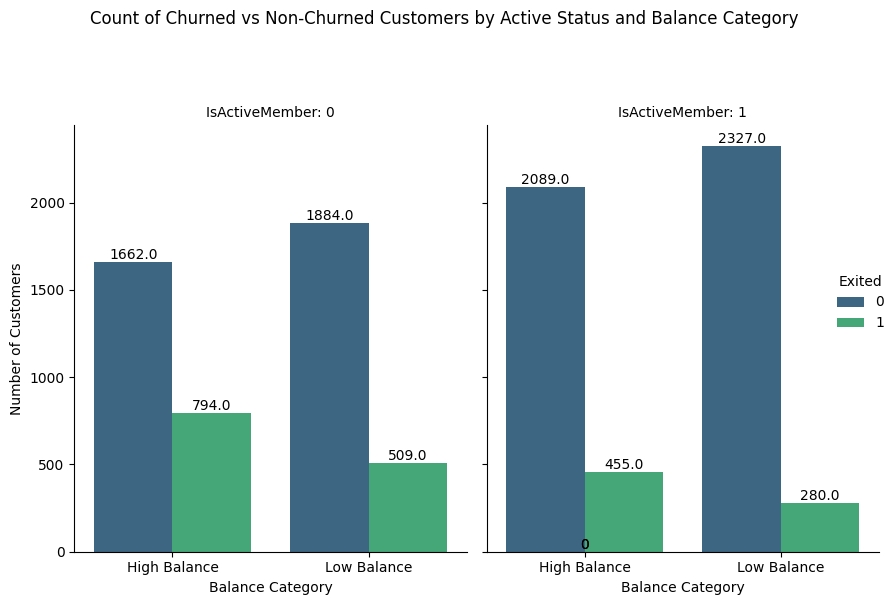

In [24]:
# Categorize 'Balance' into low and high based on the median
median_balance = df['Balance'].median()
df['Balance_Category'] = df['Balance'].apply(lambda x: 'Low Balance' if x <= median_balance else 'High Balance')

# Count of churned and non-churned customers by IsActiveMember and Balance Category
churn_balance_active_counts = df.groupby(['Exited', 'IsActiveMember', 'Balance_Category']).size().unstack(fill_value=0)

# Reshape the data for plotting (stack the Exited levels)
churn_balance_active_counts = churn_balance_active_counts.stack().reset_index(name='Count')

# Plotting using seaborn catplot (creates facets for IsActiveMember)
g = sns.catplot(x='Balance_Category', y='Count', hue='Exited', col='IsActiveMember',
                data=churn_balance_active_counts, kind='bar', palette='viridis', height=6, aspect=.7)

# Set titles and labels
g.fig.suptitle('Count of Churned vs Non-Churned Customers by Active Status and Balance Category', y=1.03) # Add title above facets
g.set_axis_labels("Balance Category", "Number of Customers")
g.set_titles("IsActiveMember: {col_name}") # Set facet titles - simplified to use col_name directly

# Add labels to the bars (requires iterating through axes and patches)
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Improve layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap

plt.show()

# Drop the temporary 'Balance_Category' column
df = df.drop('Balance_Category', axis=1)

**Insight:**
- Số lượng khách hàng rời đi trong nhóm khách hàng không hoạt động nhiều hơn đáng kể so với số lượng khách hàng rời đi trong nhóm
- Cụ thể, có 1303 khách hàng không hoạt động đã rời đi (794 với Số dư cao và 509 với Số dư thấp).
- Điều này cho thấy khách hàng không hoạt động có khả năng churn rất cao, bất kể số dư tài khoản của họ là thấp hay cao.

### 5. Tenure cao nhưng inactive → liệu có phải nhóm "chán ngân hàng" lâu năm sắp rời bỏ?

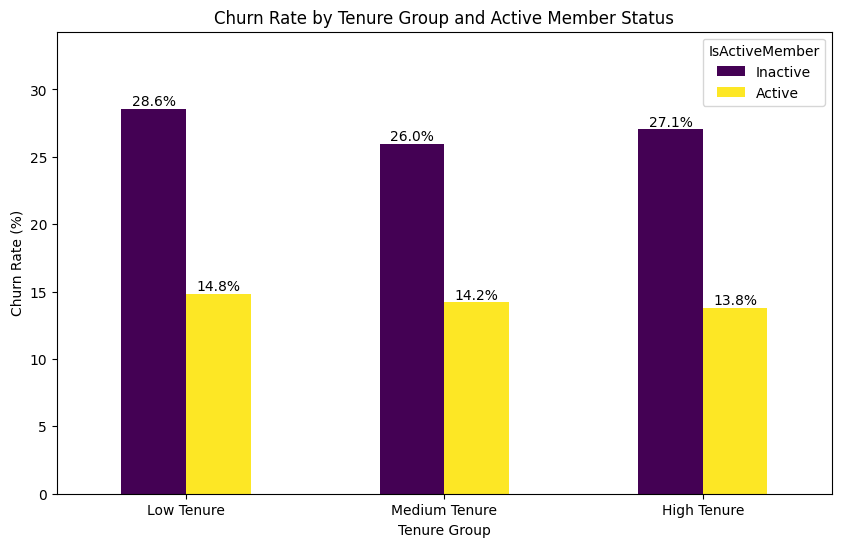

In [25]:
# Categorize Tenure into groups
def categorize_tenure(tenure):
    if tenure <= 2:
        return 'Low Tenure'
    elif tenure <= 7:
        return 'Medium Tenure'
    else:
        return 'High Tenure'

tenure_category_series = df['Tenure'].apply(categorize_tenure)

# Calculate churn rate by Tenure Category and Active Member Status
churn_by_tenure_active = df.groupby([tenure_category_series, 'IsActiveMember'])['Exited'].mean().unstack(fill_value=0)

# Multiply churn rate by 100 to get percentage
churn_by_tenure_active = churn_by_tenure_active * 100

# Define the order of Tenure Groups for plotting
tenure_order = ['Low Tenure', 'Medium Tenure', 'High Tenure']
churn_by_tenure_active = churn_by_tenure_active.reindex(index=tenure_order)

# Plotting
ax = churn_by_tenure_active.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Churn Rate by Tenure Group and Active Member Status')
plt.xlabel('Tenure Group')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=0)
plt.legend(title='IsActiveMember', labels=['Inactive', 'Active'])
plt.ylim(0, churn_by_tenure_active.values.max() * 1.2)

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')

# Removed the grid line command: plt.grid(axis='y', linestyle='--')
plt.show()

**Insight:**
- Khách hàng không hoạt động có tỷ lệ churn cao hơn đáng kể ở tất cả các nhóm thời gian gắn bó
- Đối với cả nhóm khách hàng hoạt động và không hoạt động, tỷ lệ churn đều khá đồng đều giữa các nhóm tenure

# 6. Xây dựng mô hình hồi quy logistic

## 6.1 Get dummies

In [26]:
df = pd.get_dummies(df, columns=['Geography', 'Gender', 'Card Type'])
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.0,1,1,1,101348.88,1,1,...,464,True,False,False,True,False,True,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,False,False,True,True,False,True,False,False,False
2,502,42,8,159660.8,3,1,0,113931.57,1,1,...,377,True,False,False,True,False,True,False,False,False
3,699,39,1,0.0,2,0,0,93826.63,0,0,...,350,True,False,False,True,False,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.1,0,0,...,425,False,False,True,True,False,False,True,False,False


In [27]:
excluded_cols = ['Balance', 'EstimatedSalary']
df_encoded = df.apply(lambda x: x.astype('int64') if x.name not in excluded_cols else x)
df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.0,1,1,1,101348.88,1,1,...,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.8,3,1,0,113931.57,1,1,...,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0.0,2,0,0,93826.63,0,0,...,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.1,0,0,...,425,0,0,1,1,0,0,1,0,0


## 6.2 Correlation matrix

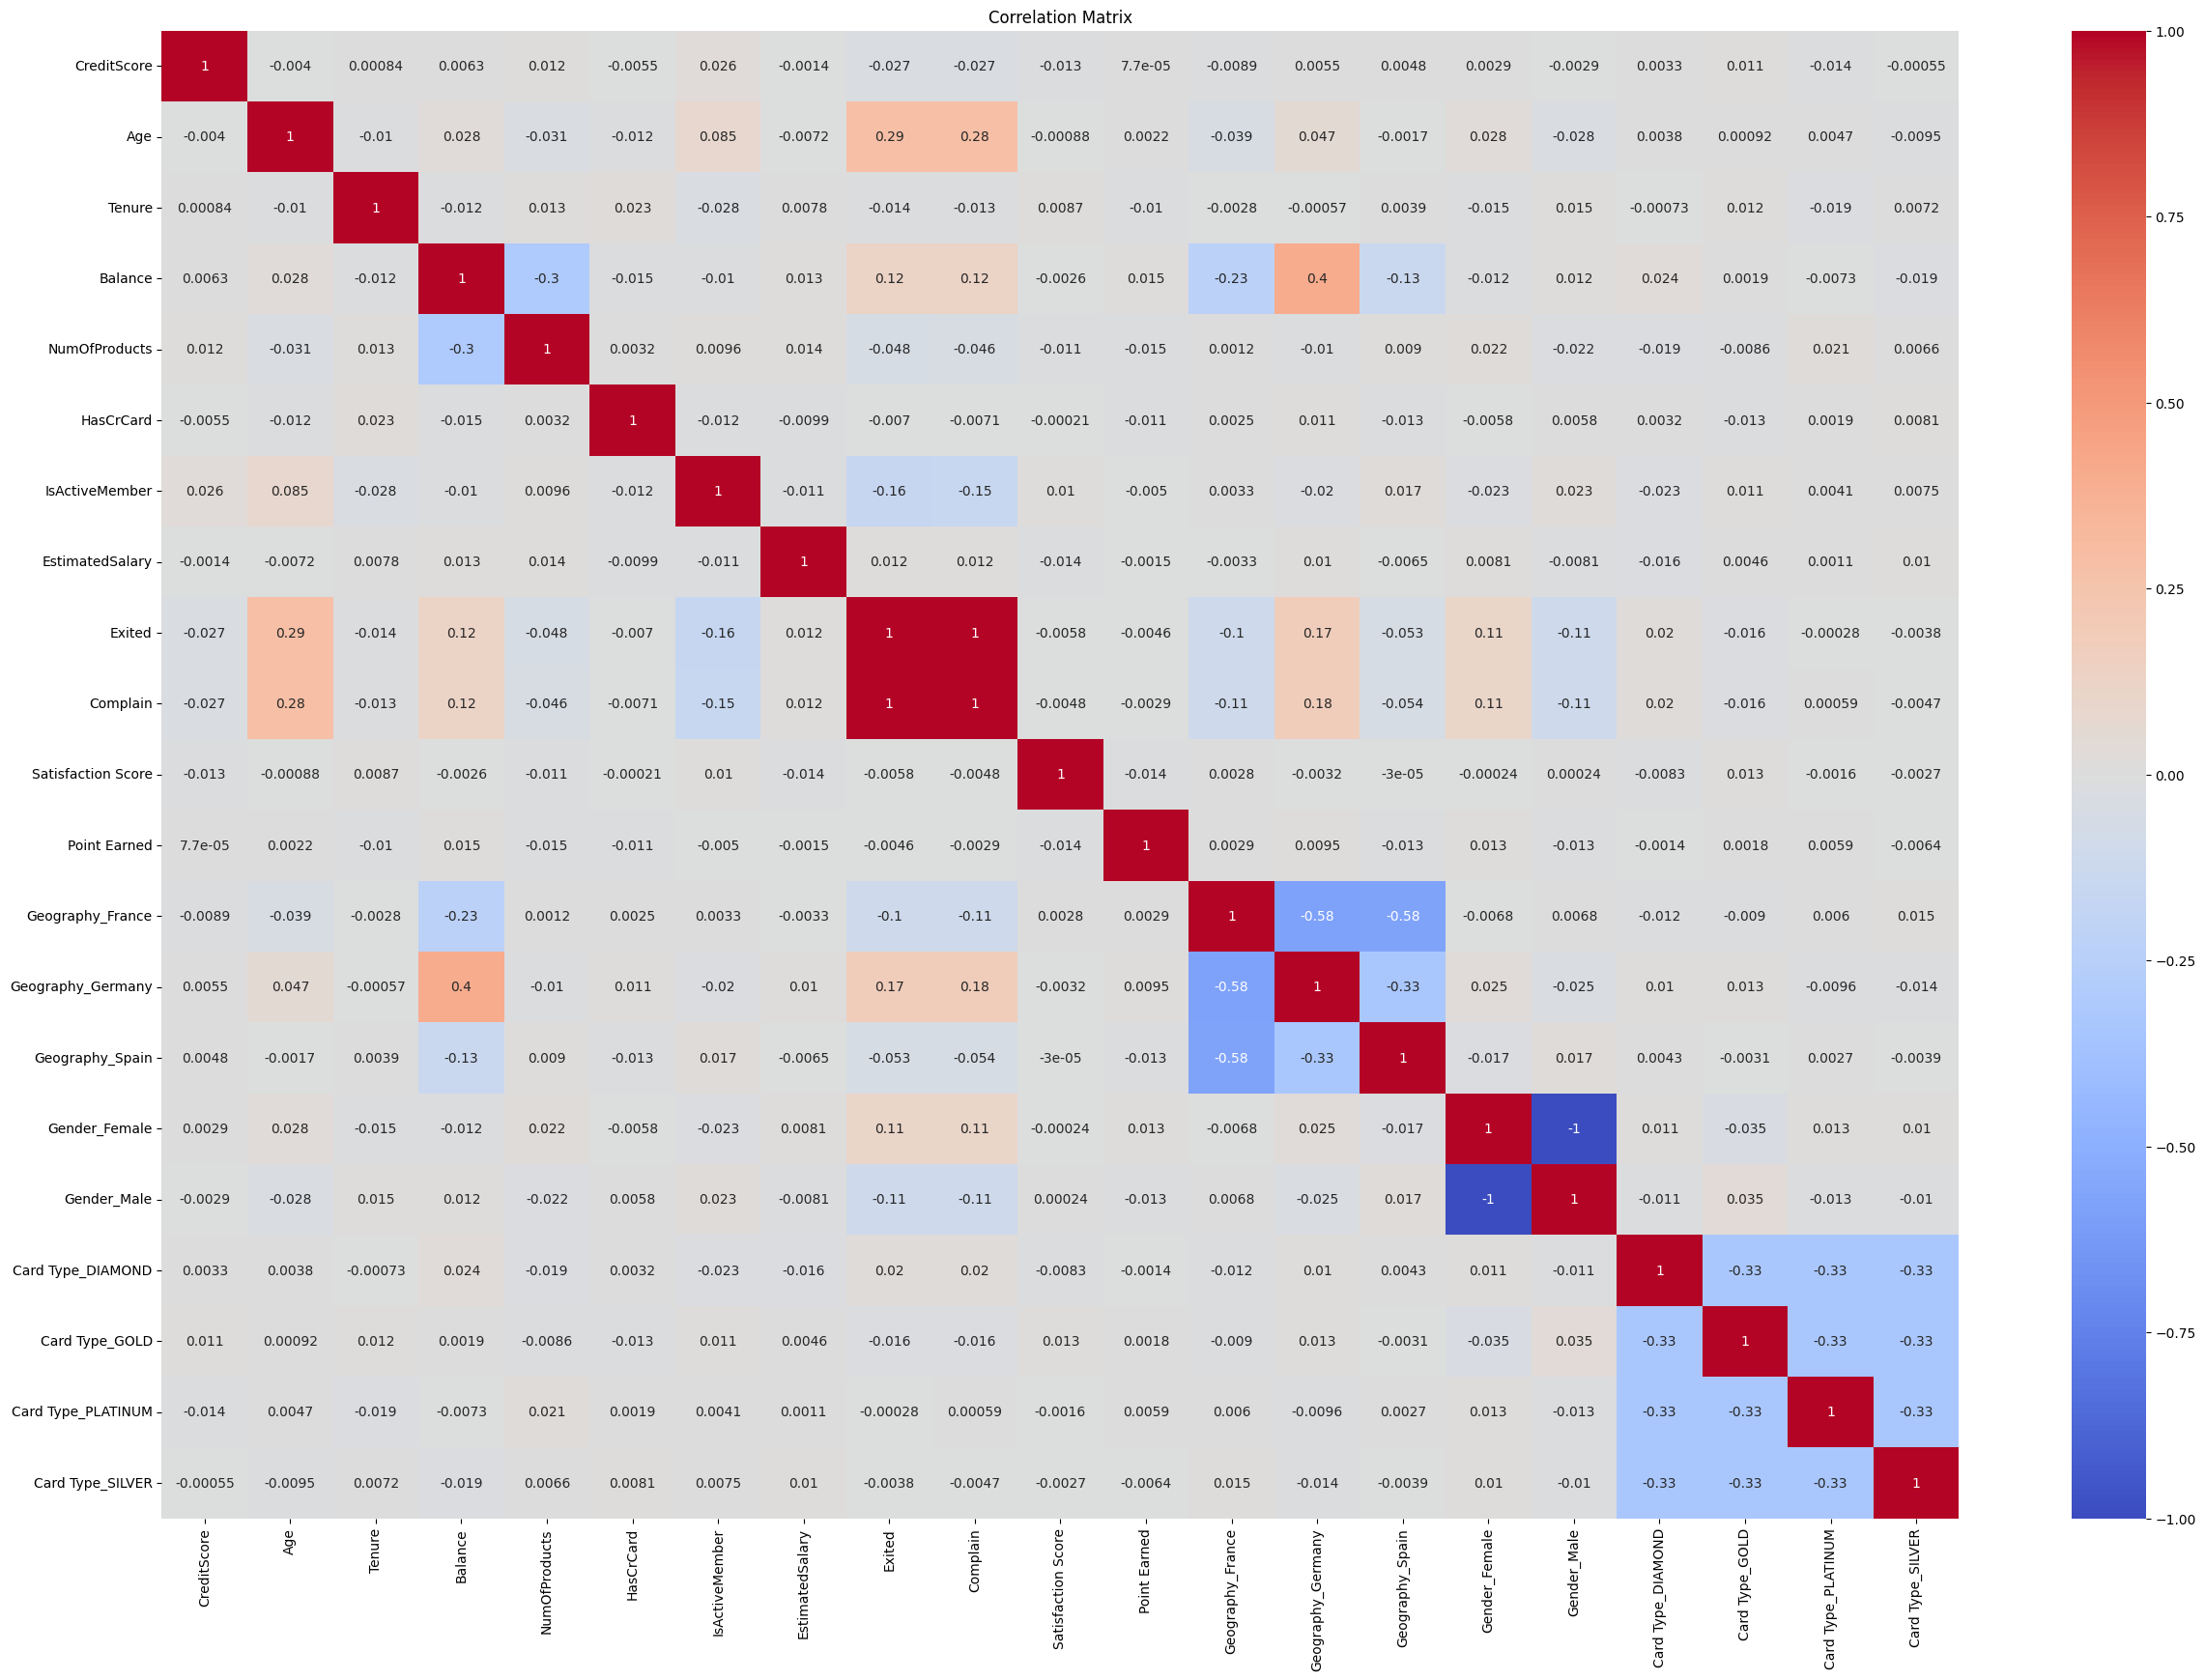

In [28]:
plt.figure(figsize=(30, 20))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- Biến 'Exited' có tương quan dương mạnh nhất với biến 'Complain'. Điều này có nghĩa là khách hàng có khiếu nại thì khả năng rời đi rất cao.
- Biến 'Exited' có tương quan dương với 'Age'. Điều này cho thấy khách hàng lớn tuổi hơn có xu hướng rời đi nhiều hơn.
- Biến 'Exited' có tương quan dương nhẹ với 'Balance'. Khách hàng có số dư cao hơn một chút có thể có xu hướng rời đi cao hơn.
- Biến 'Exited' có tương quan âm nhỏ với 'IsActiveMember'. Khách hàng hoạt động tích cực có xu hướng ít rời đi hơn.
- Các biến khác như CreditScore, Tenure, HasCrCard, EstimatedSalary, Card Type, Point Earned và các biến địa lý/giới tính có tương quan tương đối yếu hoặc rất yếu với 'Exited'.

## 6.3 Hồi quy logistic

In [29]:
# Xác định các biến độc lập X và biến phụ thuộc y
X = df_encoded.drop(['Exited', 'Geography_Spain', 'Gender_Female', 'Card Type_SILVER'], axis=1)
y = df_encoded['Exited']

# Convert Float64 columns to float64
for col in ['Balance', 'EstimatedSalary']:
    X[col] = X[col].astype('float64')

In [30]:
# Chia tập dữ liệu ra thành train và test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Các biến cần chuẩn hóa:
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Point Earned', 'Satisfaction Score']

# Huấn luyện scaler trên tập huấn luyện và áp dụng cho cả hai tập
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
print(X_train.head())

      CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
4791     0.603488 -0.372143 -1.040992 -1.226957       0.806701          1   
8881     0.965469 -0.940679 -1.386980 -0.528700      -0.910597          1   
6166     1.265396  2.375783 -1.040992  1.109612      -0.910597          0   
4473    -0.048079 -0.940679 -0.349016  0.473688      -0.910597          1   
854      0.251849  1.712490  1.034937 -1.226957       0.806701          0   

      IsActiveMember  EstimatedSalary  Complain  Satisfaction Score  \
4791               0         0.095131         0           -0.716881   
8881               1         0.344941         0           -1.425962   
6166               1         1.508981         0           -1.425962   
4473               0        -1.463621         0           -1.425962   
854                1        -0.070635         0           -0.007800   

      Point Earned  Geography_France  Geography_Germany  Gender_Male  \
4791     -0.814382                 0  

In [32]:
# Thêm hằng số cho các biển độc lập X
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
# Fit logistic regression model
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.007676
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7982
Method:                           MLE   Df Model:                           17
Date:                Fri, 10 Oct 2025   Pseudo R-squ.:                  0.9848
Time:                        07:52:00   Log-Likelihood:                -61.410
converged:                       True   LL-Null:                       -4044.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -7.6923      1.335     -5.763      0.000     -10.309      -5.076
Cred

Insight:
- const: Giá trị âm đáng kể (-7.6923) cho thấy khi tất cả các biến độc lập khác bằng 0, khách hàng sẽ có xu hướng lựa chọn ở lại.
- Biến có ý nghĩa thống kê (P>|z| < 0.05): Đây là những biến có ảnh hưởng đáng tin cậy đến khả năng churn.
  + Age: Hệ số dương (1.1768) và P-value rất nhỏ (0.000). Điều này có nghĩa là khi tuổi tăng lên (sau khi chuẩn hóa), khả năng khách hàng rời đi tăng lên đáng kể.
  + IsActiveMember: Hệ số âm (-1.7947) và P-value nhỏ (0.013). Điều này có nghĩa là khách hàng là thành viên hoạt động tích cực thì khả năng rời đi giảm đi đáng kể.
  + Complain: Hệ số dương rất lớn (14.8266) và P-value rất nhỏ (0.000). Điều này cho thấy khách hàng có khiếu nại thì khả năng rời đi là cực kỳ cao. Đây là yếu tố dự báo mạnh nhất trong mô hình.

## 6.4 Dự báo

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Khởi tạo và huấn luyện mô hình Hồi quy Logistic
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)
# Dự đoán trên tập kiểm tra
y_pred = log_model.predict(X_test)

Độ chính xác (Accuracy): 0.9985

Báo cáo Phân loại:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Ma trận nhầm lẫn:
 [[1591    1]
 [   2  406]]


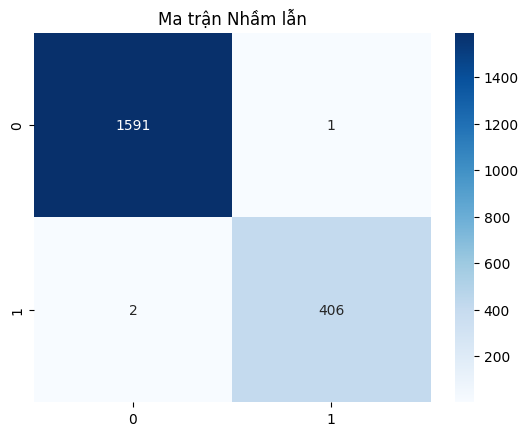

In [34]:
print("Độ chính xác (Accuracy):", accuracy_score(y_test, y_pred))
print("\nBáo cáo Phân loại:\n", classification_report(y_test, y_pred))

# Ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMa trận nhầm lẫn:\n", conf_matrix)

# Trực quan hóa Ma trận nhầm lẫn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Ma trận Nhầm lẫn')
plt.show()

Insight:
- Độ chính xác: 99.85%. Độ chính xác rất cao này cho thấy mô hình dự đoán đúng phần lớn các trường hợp.
- Báo cáo Phân loại:
  + Precision (Độ chính xác):
    * Class 0 (Non-Churned): 1.00 (100%). Khi mô hình dự đoán là Non-Churned, thì hầu như luôn đúng.
    * Class 1 (Churned): 1.00 (100%). Khi mô hình dự đoán là Churned, thì hầu như luôn đúng.
  + Recall (Độ nhạy/Tỷ lệ phát hiện đúng):
    * Class 0 (Non-Churned): 1.00 (100%). Mô hình phát hiện đúng hầu hết các khách hàng Non-Churned thực tế.
    * Class 1 (Churned): 1.00 (100%). Mô hình phát hiện đúng hầu hết các khách hàng Churned thực tế.
  + F1-Score: Kết hợp Precision và Recall. F1-score cho cả hai lớp đều là 1.00, cho thấy hiệu suất rất cao.
  + Support: Số lượng mẫu thực tế trong tập kiểm tra cho mỗi lớp (1592 Non-Churned, 408 Churned).
- Ma trận Nhầm lẫn (Confusion Matrix):
  + True Negatives (TN): 1591. Mô hình dự đoán đúng 1591 khách hàng Non-Churned là Non-Churned.
  + False Positives (FP): 1. Mô hình dự đoán sai chỉ 1 khách hàng Non-Churned là Churned (Lỗi Loại I).
  + False Negatives (FN): 2. Mô hình dự đoán sai chỉ 2 khách hàng Churned là Non-Churned (Lỗi Loại II).
  + True Positives (TP): 406. Mô hình dự đoán đúng 406 khách hàng Churned là Churned.

# 7. Tổng kết và đề xuất

## 7.1 Những insight chính
- Tỷ lệ rời bỏ: Khoảng 20.4% khách hàng đã rời bỏ ngân hàng.
- Yếu tố ảnh hưởng mạnh nhất (từ EDA và Mô hình):
  + Khiếu nại (Complain): Khách hàng có khiếu nại gần như chắc chắn sẽ rời đi (tỷ lệ churn gần 100%). Đây là yếu tố dự báo churn cực kỳ mạnh mẽ.
  + Các yếu tố có ảnh hưởng đáng kể (từ EDA và Mô hình):
  + Tuổi (Age): Khách hàng lớn tuổi hơn có xu hướng rời đi cao hơn, đặc biệt nhóm 41-60 tuổi có tỷ lệ/số lượng churn cao.
  + Trạng thái hoạt động (IsActiveMember): Khách hàng không hoạt động có tỷ lệ churn cao hơn đáng kể so với khách hàng hoạt động, bất kể thời gian gắn bó hay số dư.
- Các yếu tố có ảnh hưởng vừa phải hoặc chỉ trong một số nhóm nhất định (từ EDA):
  + Giới tính (Gender): Phụ nữ có tỷ lệ churn cao hơn nam giới.
  + Địa lý (Geography): Khách hàng ở Đức có tỷ lệ churn cao hơn đáng kể so với Pháp và Tây Ban Nha.
  + Số dư tài khoản (Balance): Khách hàng churned có xu hướng có số dư trung bình cao hơn; nhóm non-churned có nhiều khách hàng với số dư bằng 0.
  + Số lượng sản phẩm (NumOfProducts): Khách hàng có 3 hoặc 4 sản phẩm có tỷ lệ churn cực kỳ cao, mặc dù số lượng ít.
- Các yếu tố ít hoặc không ảnh hưởng rõ rệt (từ EDA và Mô hình):
  + Điểm tín dụng (CreditScore), Thu nhập ước tính (EstimatedSalary): Phân bố tương đồng giữa hai nhóm churned/non-churned và hệ số mô hình không có ý nghĩa thống kê.
  + Thời gian gắn bó (Tenure): Tỷ lệ churn khá đồng đều giữa các nhóm tenure, mặc dù nhóm không hoạt động có tỷ lệ churn cao hơn ở mọi nhóm tenure.
  + Điểm hài lòng (Satisfaction Score): Số lượng churned phân bố tương đối đồng đều trên các mức điểm hài lòng.
  + Loại thẻ (Card Type), Điểm thưởng (Point Earned): Không có mối liên hệ rõ ràng với tỷ lệ churn.
- Hiệu suất mô hình dự đoán:
  + Độ chính xác tổng thể đạt 99.85%, chứng tỏ mô hình có khả năng dự đoán chính xác cao, phù hợp để triển khai thực tế.
  + Báo cáo phân loại: Precision và Recall cho lớp Non-Churned (0) và Churned (1) đều đạt gần 100% (F1-score = 1.00), cho thấy mô hình cân bằng tốt, tránh cả lỗi bỏ sót (False Negatives: chỉ 2 trường hợp) và báo động giả (False Positives: chỉ 1 trường hợp).
  + Ma trận nhầm lẫn: Mô hình dự đoán đúng 1591/1592 khách hàng không churn và 406/408 khách hàng churn, với tổng lỗi chỉ 3/2000 mẫu. Điều này nhấn mạnh tiềm năng sử dụng AI để dự báo churn sớm.

## 7.2 Đề xuất
1. Đối với Khách hàng có Khiếu nại (Yếu tố ảnh hưởng mạnh nhất)
- Thiết lập quy trình xử lý khiếu nại ưu tiên và nhanh chóng: Đảm bảo mọi khiếu nại được tiếp nhận, phản hồi và giải quyết một cách kịp thời, chuyên nghiệp.
- Theo dõi sát sao sau khi giải quyết khiếu nại: Chủ động liên hệ với khách hàng sau khi khiếu nại được giải quyết để đảm bảo sự hài lòng và củng cố mối quan hệ.
- Phân tích nguyên nhân gốc rễ của khiếu nại: Sử dụng dữ liệu khiếu nại để xác định các vấn đề lặp đi lặp lại trong sản phẩm/dịch vụ và thực hiện cải tiến.
2. Đối với Khách hàng không Hoạt động (Inactive Members)
- Chiến dịch kích hoạt lại: Triển khai các chương trình khuyến mãi, ưu đãi đặc biệt hoặc liên hệ cá nhân để khuyến khích khách hàng sử dụng lại các dịch vụ của ngân hàng.
- Cá nhân hóa đề xuất dịch vụ: Dựa trên lịch sử giao dịch hoặc thông tin nhân khẩu học để gợi ý các sản phẩm/dịch vụ phù hợp với nhu cầu tiềm năng của khách hàng không hoạt động.
- Đơn giản hóa quy trình sử dụng: Kiểm tra và cải thiện trải nghiệm người dùng trên các kênh để giảm thiểu rào cản cho việc tái sử dụng.
3. Đối với Khách hàng lớn tuổi (Đặc biệt nhóm 41-60 tuổi)
- Cung cấp dịch vụ hỗ trợ cá nhân hóa: Phân công nhân viên hỗ trợ riêng hoặc thiết lập kênh ưu tiên cho nhóm khách hàng này.
- Giáo dục về công nghệ và dịch vụ: Tổ chức các buổi hướng dẫn hoặc cung cấp tài liệu dễ hiểu về cách sử dụng các dịch vụ số của ngân hàng.
- Xem xét lại sản phẩm/dịch vụ phù hợp: Phát triển hoặc điều chỉnh các sản phẩm tài chính phù hợp hơn với nhu cầu và giai đoạn cuộc đời của nhóm tuổi này (ví dụ: sản phẩm hưu trí, đầu tư an toàn).
4. Đối với Khách hàng ở Đức (Khu vực có tỷ lệ Churn cao)
- Nghiên cứu sâu hơn về lý do churn tại Đức: Tìm hiểu các yếu tố văn hóa, cạnh tranh hoặc đặc thù thị trường tại Đức có thể gây ra tỷ lệ churn cao hơn.
- Điều chỉnh chiến lược sản phẩm và marketing: Phát triển các sản phẩm hoặc chiến dịch marketing phù hợp hơn với thị hiếu và nhu cầu của khách hàng tại Đức.
- Tăng cường sự hiện diện và hỗ trợ địa phương: Đảm bảo dịch vụ khách hàng và các kênh hỗ trợ tại Đức đáp ứng tốt nhu cầu của khách hàng.
5. Đối với Khách hàng có nhiều sản phẩm (3 hoặc 4 sản phẩm)
- Phân tích lợi nhuận/giá trị của nhóm này: Mặc dù tỷ lệ churn cao, cần hiểu rõ giá trị mà nhóm này mang lại để quyết định mức độ đầu tư vào chiến lược giữ chân.
- Tìm hiểu lý do churn đột ngột: Nhóm này có tỷ lệ churn gần 100%, cho thấy có vấn đề nghiêm trọng xảy ra. Cần điều tra nguyên nhân cụ thể (ví dụ: thay đổi chính sách, trải nghiệm tiêu cực).
- Cân nhắc lại cấu trúc sản phẩm/gói dịch vụ: Đảm bảo việc sử dụng nhiều sản phẩm mang lại lợi ích rõ ràng và không tạo ra gánh nặng hoặc sự phức tạp cho khách hàng.
6. Các đề xuất chung
- Phân tích giá trị vòng đời khách hàng (CLTV): Tập trung nỗ lực giữ chân vào các khách hàng có CLTV cao nhất.
- Triển khai hệ thống cảnh báo sớm churn: Sử dụng mô hình dự đoán để xác định khách hàng có nguy cơ cao và can thiệp kịp thời.
- Thu thập phản hồi thường xuyên: Sử dụng khảo sát, phỏng vấn để hiểu rõ hơn về sự hài lòng và nhu cầu của khách hàng.